In [3]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.1
Grader version: 0.22.12


In [4]:
# 계정이 잘 저장되어 있는지 확인합니다
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'account-name': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum-platform': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'my-quantum-account': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': 'c48268e836ab

In [5]:
# 일반적인 패키지부터 불러옵니다.
import numpy as np

# Qiskit 클래스들을 불러옵니다.
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# util과 ecosystem 패키지들을 불러옵니다.
from lab4_util import hamming_distance, minimum_distance, bring_states, matrixRank
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2  as Sampler

# grader를 불러옵니다.
from qc_grader.challenges.qgss_2025 import (
    grade_lab4_ex1, 
    grade_lab4_ex2, 
    grade_lab4_ex3,
    grade_lab4_ex4,
    grade_lab4_ex5,
    grade_lab4_ex6
)

In [6]:
# --- 예시: 간단한 [4, 3, 2] 패리티 검사 코드 ---
# 이 코드는 3개의 메시지 비트(k=3)를 받고 패리티 검사 비트를 추가해
# 전체 부호문의 길이 n=4 로 만듭니다.
# 메시지: 000, 001, 010, 011, 100, 101, 110, 111
# 부호문 (패리티 비트를 더해줍니다)
parity_code_4_3 = [
    "0000", # 000 + 0 (짝수 패리티)
    "0011", # 001 + 1
    "0101", # 010 + 1
    "0110", # 011 + 0
    "1001", # 100 + 1
    "1010", # 101 + 0
    "1100", # 110 + 0
    "1111"  # 111 + 1
]

# 최소 거리 d를 계산합니다.
d_parity = minimum_distance(parity_code_4_3)
print(f"부호문: {parity_code_4_3}")
print(f"계산된 최소 거리 d = {d_parity}") # 결과: 2

부호문: ['0000', '0011', '0101', '0110', '1001', '1010', '1100', '1111']
계산된 최소 거리 d = 2


In [7]:
# --- 예시: [3, 1, 3] 반복 코드 ---
repetition_code_3_1 = ["000", "111"]
d_repetition = minimum_distance(repetition_code_3_1)
print(f"계산된 최소 거리 d = {d_repetition}") # 결과: 3

# d=3의 능력:
t_detect = d_repetition - 1
t_correct = int((d_repetition - 1) / 2) // 1
print(f"오류 탐지 능력 (t_detect = d-1): {t_detect}") # 결과: 2
print(f"오류 정정 능력(t_correct = floor((d-1)/2)): {t_correct}") # 결과: 1

계산된 최소 거리 d = 3
오류 탐지 능력 (t_detect = d-1): 2
오류 정정 능력(t_correct = floor((d-1)/2)): 1


In [8]:
test_str = "010"

print("010과 000 사이의 해밍 거리", hamming_distance(test_str, "000"))
print("010과 111 사이의 해밍 거리", hamming_distance(test_str, "111"))

010과 000 사이의 해밍 거리 1
010과 111 사이의 해밍 거리 2


In [9]:
hardcode_decoder_3_1_3 ={
    '000': '0',
    '001': '',
    '010': '',
    '011': '',
    '100': '',
    '101': '',
    '110': '',
    '111': '1'}

In [10]:
hardcode_decoder_bit_flip_syndrome_map = {
    # --- 아래에 코드를 작성해주세요 ---
    # 디코더에서 비어있는 나머지 항들을 채워주세요 (''는 유지)
    # {"s1s0": "오류 코드"}
    '00': 'I',
    '01': 'X2',             
    '10': 'X0',            
    '11': 'X1'     
    # --- 코드 작성이 완료되었습니다 ---         
}

In [11]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab4_ex1(hardcode_decoder_bit_flip_syndrome_map )

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [12]:
# --- 아래에 코드를 작성해주세요 ---
# 나머지 오류 코드를 작성해보세요
steane_decoder_syndrome_map = {
    '111000': 'X0',
    '011000': 'X1',
    '101000': 'X2',
    '001000': 'X3',
    '110000': 'X4',
    '010000': 'X5',
    '100000': 'X6',
    '111111': 'Y0',
    '011011': 'Y1',
    '101101': 'Y2',
    '001001': 'Y3',
    '110110': 'Y4',
    '010010': 'Y5',
    '100100': 'Y6',
    '000111': 'Z0',
    '000011': 'Z1',
    '000101': 'Z2',
    '000001': 'Z3',
    '000110': 'Z4',
    '000010': 'Z5',
    '000100': 'Z6',
    '000000': 'I'}
# --- 코드 작성이 완료되었습니다 ---

In [13]:

# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab4_ex2(steane_decoder_syndrome_map)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [14]:
def measure_steane_syndrome(qc, q_data, q_anc, c_reg):

    # X 스태빌라이저를 측정하세요 (S0, S1, S2 -> q_anc[0], q_anc[1], q_anc[2])
    # 모든 정보 큐비트에 H 연산을 하고, CNOT 연산을 한 뒤에, 정보 큐비트에 H 연산을 하고, 보조 큐비트를 측정하세요
    qc.h(q_data) # 정보 큐비트에 H 연산

    #S0: IIIXXXX (X_3 X_2 X_1 X_0)
    qc.cx(q_data[0], q_anc[0])
    qc.cx(q_data[1], q_anc[0])
    qc.cx(q_data[2], q_anc[0])
    qc.cx(q_data[3], q_anc[0])

    # --- 아래에 코드를 작성해주세요 ---
    # S1 과 S2 에 해당하는 코드를 작성해주세요
    #S1: IXXIIXX
    qc.cx(q_data[0], q_anc[1])
    qc.cx(q_data[1], q_anc[1])
    qc.cx(q_data[4], q_anc[1])
    qc.cx(q_data[5], q_anc[1])
    #S2: XIXIXIX
    qc.cx(q_data[0], q_anc[2])
    qc.cx(q_data[2], q_anc[2])
    qc.cx(q_data[4], q_anc[2])
    qc.cx(q_data[6], q_anc[2])
    # --- 코드 작성이 완료되었습니다 ---

    qc.h(q_data) # 정보 큐비트에 다시 H 연산
    qc.measure(q_anc[0:3], c_reg[0:3]) # X 징후 (s1, s2, s3) 측정
    qc.barrier()


    # --- 아래에 코드를 작성해주세요 ---
    # Z 스태빌라이저를 측정하세요 (S3, S4, S5 -> q_anc[3], q_anc[4], q_anc[5])
    # CNOT을 하고 보조 큐비트를 측정하세요
    # S3, S4와 S5을 위해 필요한 코드를 작성해주세요

    #S3: IIIZZZZ
    qc.cx(q_data[0], q_anc[3])
    qc.cx(q_data[1], q_anc[3])
    qc.cx(q_data[2], q_anc[3])
    qc.cx(q_data[3], q_anc[3])
    #S4: IZZIIZZ
    qc.cx(q_data[0], q_anc[4])
    qc.cx(q_data[1], q_anc[4])
    qc.cx(q_data[4], q_anc[4])
    qc.cx(q_data[5], q_anc[4])
    #S5: ZIZIZIZ
    qc.cx(q_data[0], q_anc[5])
    qc.cx(q_data[2], q_anc[5])
    qc.cx(q_data[4], q_anc[5])
    qc.cx(q_data[6], q_anc[5])
    # --- 코드 작성이 완료되었습니다 ---
    
    qc.measure(q_anc[3:6], c_reg[3:6]) # Z 징후 (s3, s4, s5) 측정
    qc.barrier()

In [15]:
state = bring_states()

# 논리 큐비트 (7개의 정보 큐비트)
qr_data = QuantumRegister(7, name='q')
# 징후 측정을 위한 보조 큐비트 (6)
qr_anc = QuantumRegister(6, name='anc')
# 징후 측정을 위한 고전 레지스터 (초기화 및 검사)
cr_initial_syn = ClassicalRegister(6, name='c_initial_syn')
cr_final_syn = ClassicalRegister(6, name='c_final_syn')

# 전체 회로 (13개의 큐비트, 12개의 고전 비트)
qc = QuantumCircuit(qr_data, qr_anc, cr_initial_syn, cr_final_syn)


# --- 아래에 코드를 작성해주세요 ---
# 원하는 상태로 qc를 초기화 시키세요
qc.initialize(state, qr_data)

# --- 코드 작성이 완료되었습니다 ---

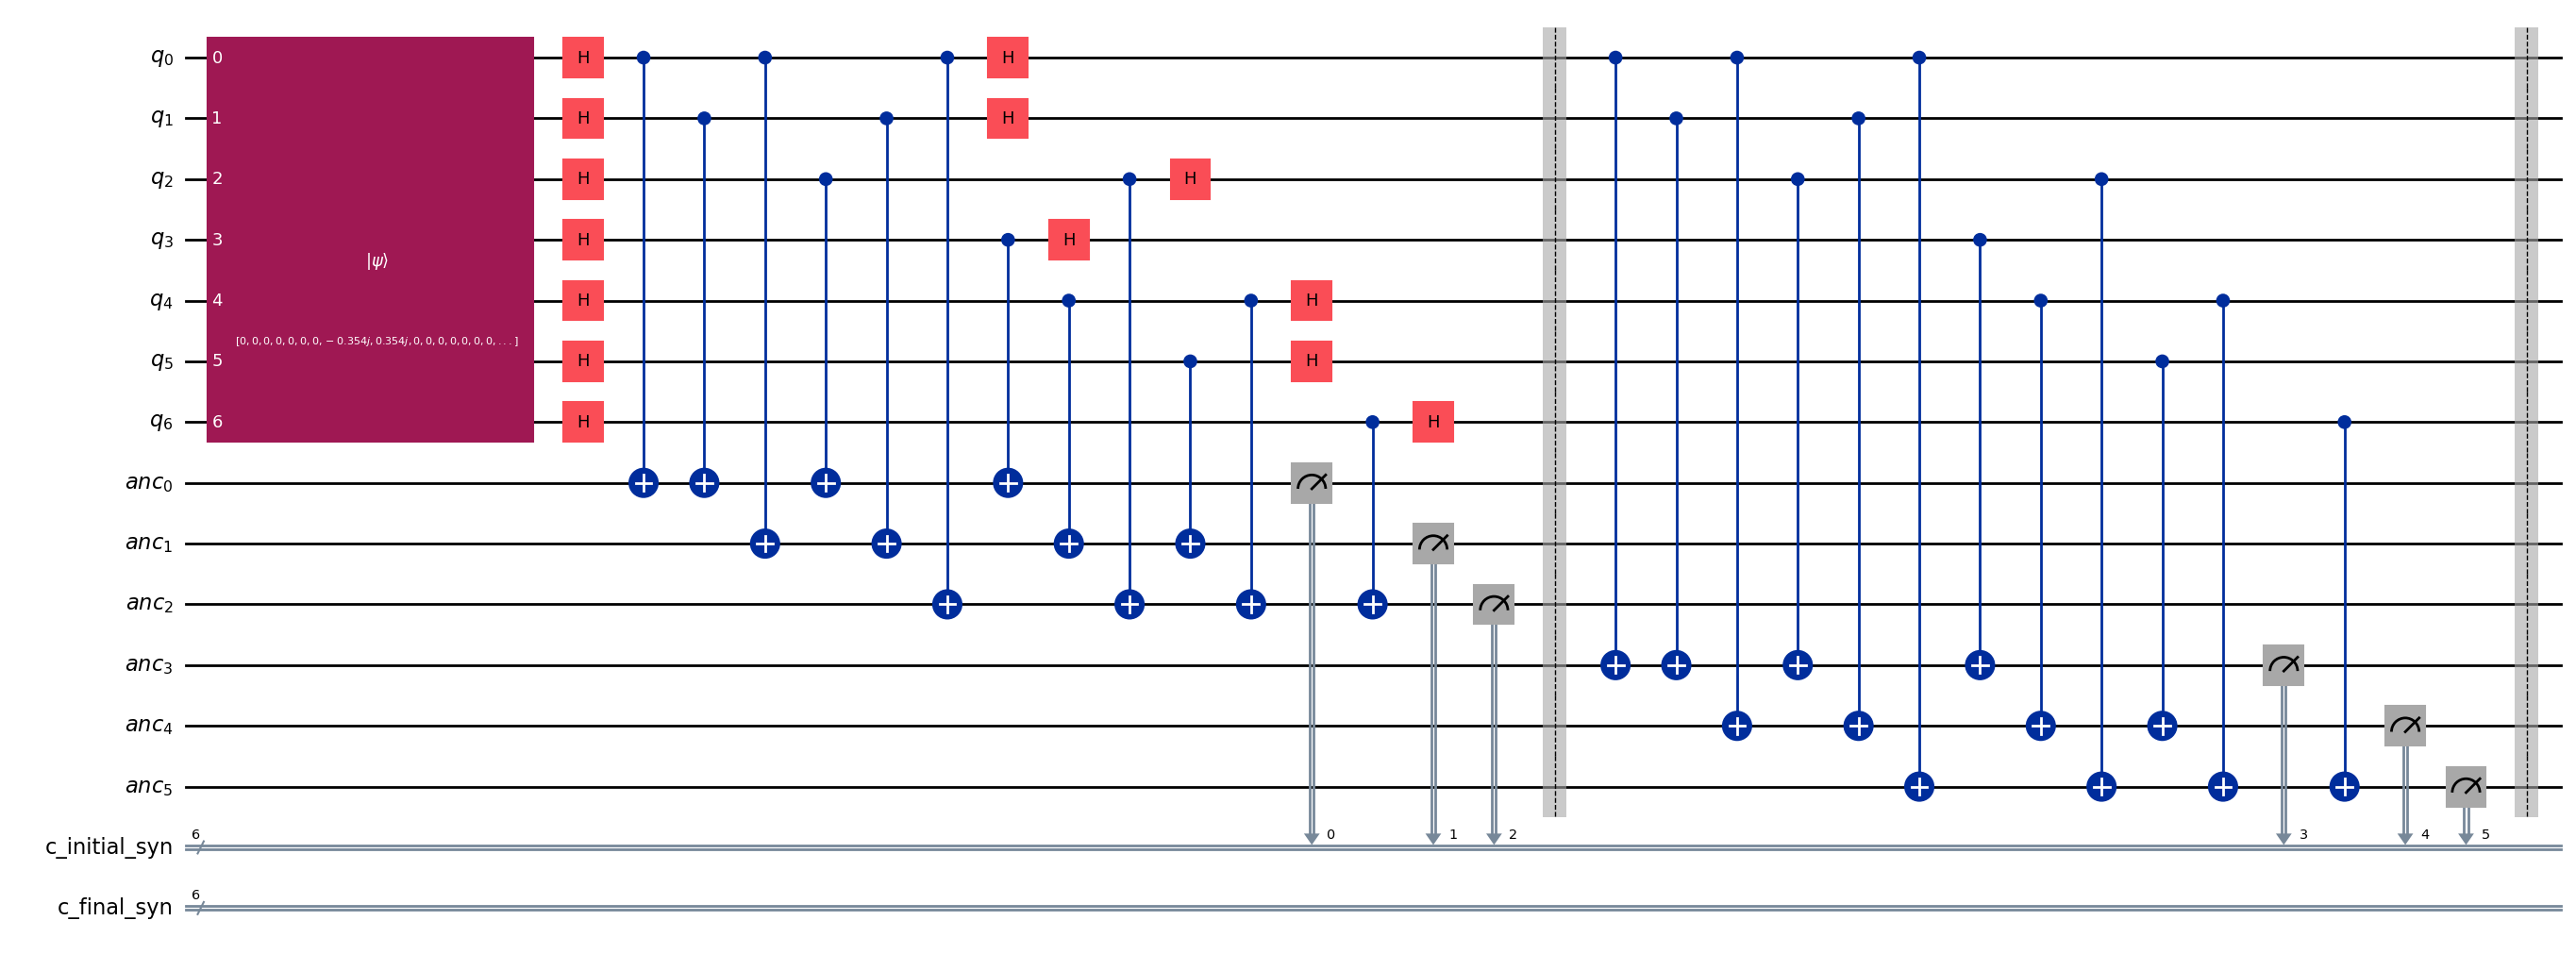

In [16]:
# --- 징후 측정을 가합니다 ---

measure_steane_syndrome(qc, qr_data, qr_anc, cr_initial_syn)

qc.draw('mpl', fold=-1)

In [17]:
# --- AerSimulator를 이용하여 시뮬레이션을 실행합니다
backend = AerSimulator()

# 양자 회로를 사용하는 백엔드에 맞게 최적화합니다
pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
qc_isa = pm.run(qc)

# 코드를 실행하고 실행 결과 (count) 를 얻습니다
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 10000).result()[0].data.c_initial_syn.get_counts()

# --- 아래에 코드를 작성해주세요 ---
# 시뮬레이션 결과에서 key를 찾아 "X1"과 같이 오류 코드로 변환하세요

error_code = steane_decoder_syndrome_map.get(max(counts, key=counts.get))
# --- 코드 작성이 완료되었습니다 ---

In [18]:
plot_histogram(counts)
error_code

'Y3'

In [19]:
grade_lab4_ex3(error_code)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [20]:
# 연습문제 4를 시작하기 위한 도움말


# Toric 코드의 패리티 검사 행렬을 정의합니다
HXtc = np.zeros((72, 144),dtype=int) # 행렬을 먼저 초기화합니다
HZtc = np.zeros((72, 144),dtype=int)

# 우리는 여러분에게 알맞은 곳에 1을 더함으로써 행렬을 수정하도록 요청할 것입니다
# 예시를 위해 같이 toric 코드의 첫 몇 개의 행을 채워보도록 하겠습니다


# --- 아래에 코드를 작성해주세요 ---
# HXtc와 HZtc를 계산하기 위한 코드를 작성하세요

# 0번째 스태빌라이저
HXtc[0][0] = 1
HXtc[0][1] = 1
HXtc[0][72] = 1
HXtc[0][138] = 1

# 1번째 스태빌라이저
HXtc[1][1] = 1
HXtc[1][2] = 1
HXtc[1][73] = 1
HXtc[1][139] = 1

# 2번째 스태빌라이저
HXtc[2][2] = 1
HXtc[2][3] = 1
HXtc[2][74] = 1
HXtc[2][140] = 1

# 3번째 스태빌라이저
HXtc[3][3] = 1
HXtc[3][4] = 1
HXtc[3][75] = 1
HXtc[3][141] = 1

# 4번째 스태빌라이저
HXtc[4][4] = 1
HXtc[4][5] = 1
HXtc[4][76] = 1
HXtc[4][142] = 1

# 5번째 스태빌라이저
HXtc[5][5] = 1
HXtc[5][np.mod(6,6)] = 1
HXtc[5][72 + 5] = 1
HXtc[5][72 + 6*np.mod(-1,12) + 5] = 1

# 마지막 정의는 어느 위치에 1을 두어야 하는지에 대한 일반적인 규칙을 제시합니다
# HXtc[j][j] = 1
# HXtc[j][6*np.floor(j/6) + np.mod(j+1,6)]
# HXtc[j][j+72] = 1
# HXtc[j][72 + 6*np.mod(np.floor(j/6)-1,12) + np.mod(j,6)]

# 0부터 143까지의 j에 대한 반복문을 작성하여 모든 열을 채워넣어 보세요

# 위의 예시를 참고하여, Z 패리티 검사 행렬을 반복문을 사용하여 작성하고 HXtc와 HZtc를 완성하세요

HZtc[0][0] = 1
HZtc[0][6] = 1
HZtc[0][72] = 1
HZtc[0][77] = 1

for j in range(72):
    # face (X) stabilizer
    HXtc[j][j] = 1
    HXtc[j][6*(j//6) + (j % 6 + 1) % 6] = 1
    HXtc[j][j + 72] = 1
    HXtc[j][72 + 6*((j//6 - 1) % 12) + (j % 6)] = 1

    # vertex (Z) stabilizer
    HZtc[j][j] = 1
    HZtc[j][(j + 6) % 72] = 1
    HZtc[j][j + 72] = 1
    HZtc[j][72 + 6*(j//6) + (j % 6 - 1) % 6] = 1



# --- 코드 작성이 완료되었습니다 ---

In [21]:
# HXtc와 HZtc의 연결성을 확인해보세요

from lab4_util import generate_stabilizer_plots
generate_stabilizer_plots(HXtc, HZtc)

NameError: name 'plt' is not defined

In [22]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab4_ex4(HXtc, HZtc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [23]:
# Gross 코드의 패리티 검사 행렬을 정의합니다
HXgc = np.zeros((72,144),dtype=int) # 행렬을 먼저 초기화합니다
HZgc = np.zeros((72,144),dtype=int)
# --- 아래에 코드를 작성해주세요 ---
# HXtc와 HZtc를 계산하기 위한 코드를 작성하세요

# 0번째 X 스태빌라이저
HXgc[0][0] = 1
HXgc[0][1] = 1
HXgc[0][20] = 1
HXgc[0][72] = 1
HXgc[0][135] = 1
HXgc[0][138] = 1


# 0번째 Z 스태빌라이저
HZgc[0][0] = 1
HZgc[0][6] = 1
HZgc[0][15] = 1
HZgc[0][72] = 1
HZgc[0][77] = 1
HZgc[0][130] = 1

for j in range(72):
    # --- X 스태빌라이저 행 j 채우기 ---
    HXgc[j][j] = 1
    HXgc[j][6 * (j//6) + ((j + 1) % 6)] = 1
    HXgc[j][j + 72] = 1
    HXgc[j][6 * ((j// 6 + 3) % 12) + ((j + 2) % 6)] = 1
    HXgc[j][72 + 6 * ((j // 6 - 2) % 12) +((j + 3) % 6)] = 1
    HXgc[j][72 + 6 * ((j // 6 -1) % 12) +(j % 6)] = 1

    HZgc[j][j] = 1
    HZgc[j][6 * ((j//6 + 1) % 12) + (j % 6)]               = 1  # (j+6)%72
    HZgc[j][6 * ((j//6 + 2) % 12) + ((j % 6 + 3) % 6)]      = 1  # (j+15)%72
    HZgc[j][j + 72]                                         = 1
    HZgc[j][72 + 6 * ((j//6)     % 12) + ((j % 6 - 1) % 6)] = 1  # (j+77)%144
    HZgc[j][72 + 6 * ((j//6 - 3) % 12) + ((j % 6 + 4) % 6)] = 1  # (j+130)%144




# --- 코드 작성이 완료되었습니다 ---

In [24]:
generate_stabilizer_plots(HXgc, HZgc)

NameError: name 'plt' is not defined

In [25]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab4_ex5(HXgc, HZgc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [26]:
from lab4_util import matrixRank

In [29]:
# --- 아래에 코드를 작성해주세요 ---
# k_toric과 k_gross를 계산하는 코드를 작성하세요
# 힌트: lab4_utils에서 불러온 matrixRank를 사용할 수 있습니다

# toric 코드
rx_toric = matrixRank(HXtc)
rz_toric = matrixRank(HZtc)
k_toric  = 144 - rx_toric - rz_toric

# gross 코드
rx_gross = matrixRank(HXgc)
rz_gross = matrixRank(HZgc)
k_gross  = 144 - rx_gross - rz_gross
# --- 코드 작성이 완료되었습니다 ---

In [30]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab4_ex6(k_toric, k_gross)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [31]:
# 아래의 함수를 실행해 현재의 진도 상황을 확인해보세요
from qc_grader.grader.grade import check_lab_completion_status

check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 2450 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 2015 participants have completed this lab
Lab 2: 7/7 exercises completed (100%)
    ✅ 1306 participants have completed this lab
Lab 3: 5/5 exercises completed (100%)
    ✅ 1123 participants have completed this lab
Lab 4: 6/6 exercises completed (100%)
    ✅ 1032 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 5 participants have completed this lab
